### Women in Data Science - ATX Meetup
# Ch. 15: Multiple Regression & Ch. 8: Gradient Descent

## Anne Russell & Akshata Mohan 2016
### 
This notebook uses a Credit dataset to cover Multiple Regression (Chapter 15) and Gradient Descent (Chapter 08) from the book DATA SCIENCE FROM SCRATCH by Joel Grus.

- Download the Jupyter notebook for these slides [here](https://github.com/womenindatascienceatx) 

# Multiple Regression
## Recall Linear Regression
## Introduce Multiple Regression
    ### Model
    ### Additional Assumptions
    ### Example in Python
        #### Interpretation
        #### Goodness of Fit
        #### Standard Error of Parameter Estimates
    ### Bootstrapping
    ### Interactions
## Gradient Descent
    ### polynomial - set up
    ### Example in Python
        ### Mean Model
        ### weighted params model
        ### estimated params model
    ### stochastic gradient descent
## Regularization
    ### Define
    ### Ridge Regression + in Python
    ### LASSO + in Python
## References
    

# Multiple Regression
### example in Python

# Load library dependencies and document software versions

In [2]:
#Import pandas
import pandas as pd
# Import numpy
import numpy as np
# Import matplotlib
import matplotlib.pyplot as plt
#Import statsmodels
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
# Import the linear regression class
from sklearn.linear_model import LinearRegression

#Import seaborn
import seaborn as sns 
sns.set_style("white")
#make figures appear as they're made
%matplotlib inline 

In [3]:
# Always good practice to note the version info
import sys
import matplotlib as mpl
print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)
#print("matplotlib " + mpl.__version__)
print("seaborn " + sns.__version__)

python 2.7.11 | 64-bit | (default, Jun 11 2016, 11:33:47) [MSC v.1500 64 bit (AMD64)]

pandas 0.18.0
numpy 1.10.4
seaborn 0.7.0


## Load Credit.csv dataset contains balance and customer attributes data for potential customers.
It is taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) 
by G. James, D. Witten,  T. Hastie and R. Tibshirani, and can be found at http://www-bcf.usc.edu/~gareth/ISL/data.html

In [4]:
# loading Credit.csv data
Credit = pd.read_csv("Credit.csv")
Credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## How many variables are present?

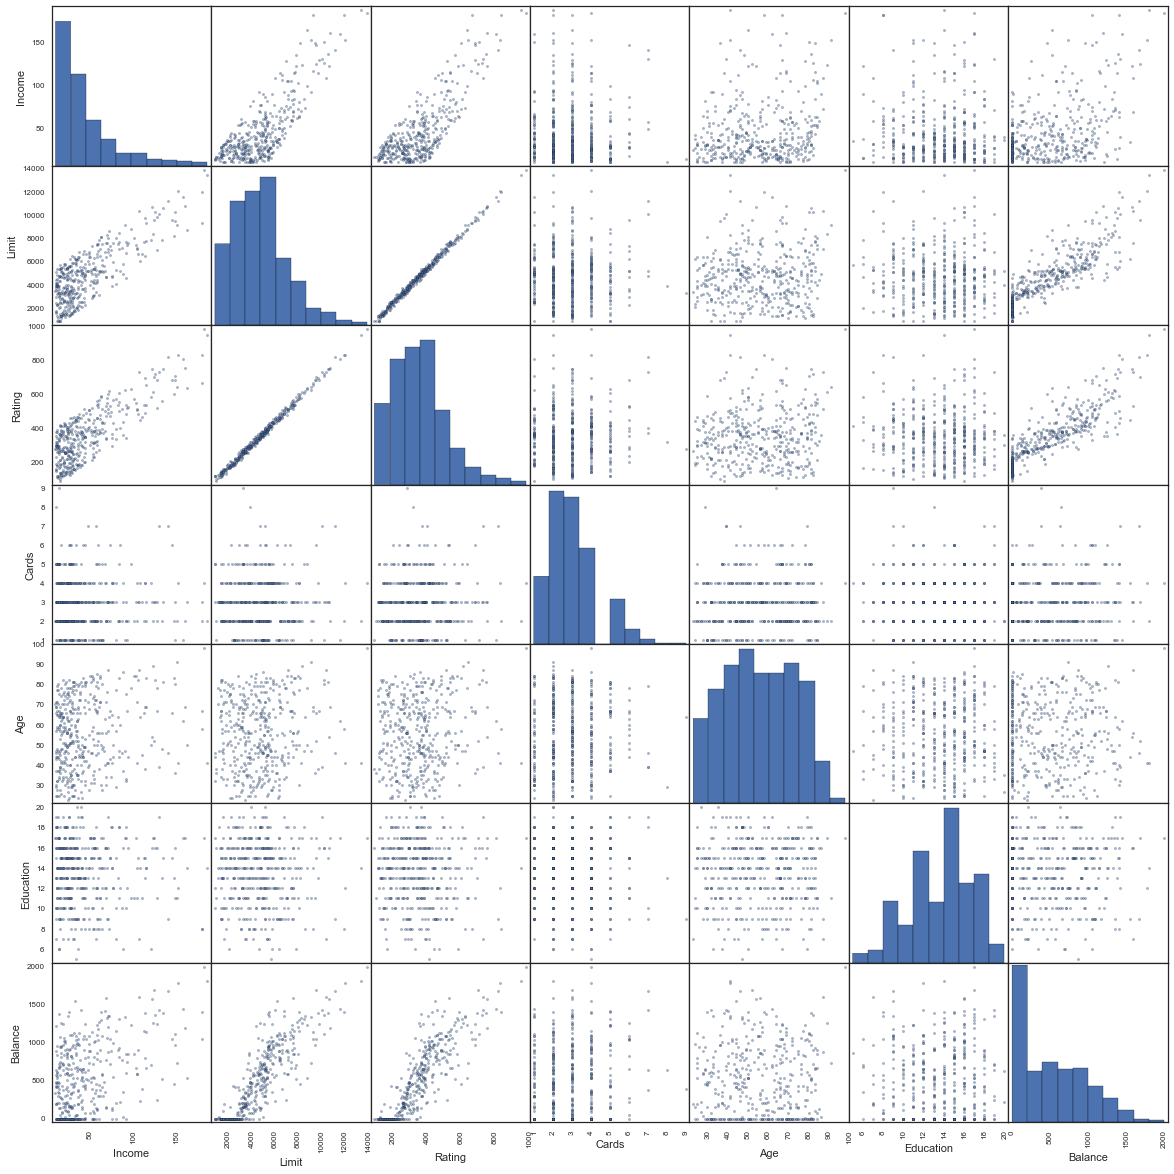

In [5]:
# Scatterplot Matrix to take a first look at the data
#  from http://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
from pandas.tools.plotting import scatter_matrix
#names = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance']
scatter_matrix(Credit,figsize=[20,20])
plt.show()

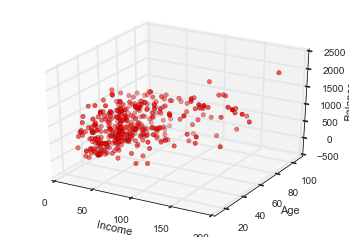

In [6]:
# let's decide to look at Balance as a function of Income and Age
# 1st, plot your data
# 3D plot of Balance v. Income and Age
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Credit['Income'], Credit['Age'], Credit['Balance'], c='r', marker='o')

ax.set_xlabel('Income')
ax.set_zlabel('Balance')
ax.set_ylabel('Age')

plt.show()

#plt.savefig('MR3D.png')

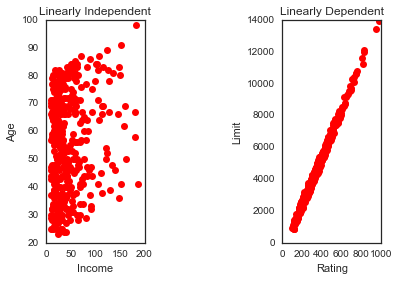

In [7]:
# checking for multicollinearity (in case you forgot to do your scatterplot)
plt.subplot(1, 3, 1)
plt.plot(Credit['Income'], Credit['Age'], 'ro')
plt.title('Linearly Independent')
plt.xlabel('Income')
plt.ylabel('Age')

# this is here for grins and as an example of what multicollinearity looks like
plt.subplot(1, 3, 3)
plt.plot(Credit['Rating'], Credit['Limit'], 'ro')
plt.title('Linearly Dependent')
plt.xlabel('Rating')
plt.ylabel('Limit')

plt.show()

In [8]:
# use the Credit to create a multiple regression model of 
#     Balance as a function of Income and Age
#from scipy import stats
from statsmodels.formula.api import ols

model_mr = ols('Balance ~ Income + Age', Credit).fit()
print(model_mr.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     56.47
Date:                Wed, 07 Sep 2016   Prob (F-statistic):           2.60e-22
Time:                        17:20:37   Log-Likelihood:                -2969.3
No. Observations:                 400   AIC:                             5945.
Df Residuals:                     397   BIC:                             5957.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    359.6727     70.358      5.112      0.0

In [17]:
# Another look at model parameters to reference in predicted value calcs
model_mr.params


Intercept    359.672743
Income         6.235879
Age           -2.185067
dtype: float64

In [9]:
# calculate the Predicted Balance using the MultRegn model results
Credit['PredBalance'] = model_mr.params[0] + model_mr.params[1]*Credit['Income'] + model_mr.params[2]*Credit['Age']
# optionally:
# Credit['PredBalance'] = model_mr.params['Intercept'] + model_mr.params['Income']*Credit['Income'] + model_mr.params['Age']*Credit['Age']

# Calculate the Residuals
Credit['Error'] = Credit['Balance'] - Credit['PredBalance']
Credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,PredBalance,Error
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,378.238925,-45.238925
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,841.656292,61.343708
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,856.762255,-276.762255
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1209.682371,-245.682371
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,559.561551,-228.561551


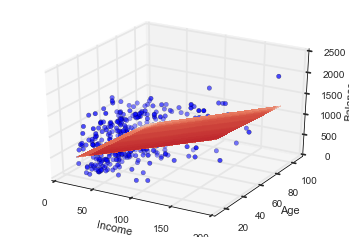

In [10]:
# surface plot of multiple regression Balance = 359.7 + 6.24*Credit['Income'] - 2.19*Credit['Age']
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
x = Credit['Income']
y = Credit['Age']
x, y = np.meshgrid(x, y)
zpred = model_mr.params[0] + model_mr.params[1]*x + model_mr.params[2]*y
#zpred = 359.7 + 6.24*x - 2.19*y

# begin with 3D scatter plot
ax.scatter(Credit['Income'], Credit['Age'], Credit['Balance'])
# add surface plot
surf = ax.plot_surface(x, y, zpred, 
                       rstride=1, cstride=1, 
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.2)
# axis modifications
ax.set_zlim(0, 2500)
ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# axis labels
ax.set_xlabel('Income')
ax.set_zlabel('Balance')
ax.set_ylabel('Age')

plt.show()


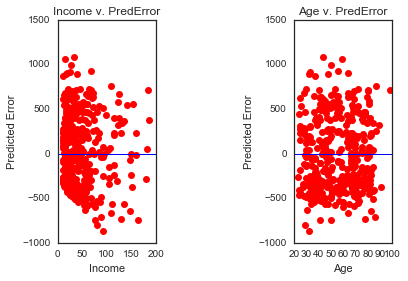

In [11]:
# check your residuals versus the X's
plt.subplot(1, 3, 1)
plt.plot(Credit['Income'], Credit['Error'], 'ro')
plt.title('Income v. PredError')
plt.xlabel('Income')
plt.ylabel('Predicted Error')
plt.axhline(y=0,c="blue",linewidth=1)

plt.subplot(1, 3, 3)
plt.plot(Credit['Age'], Credit['Error'], 'ro')
plt.title('Age v. PredError')
plt.xlabel('Age')
plt.ylabel('Predicted Error')
plt.axhline(y=0,c="blue",linewidth=1)

plt.show()

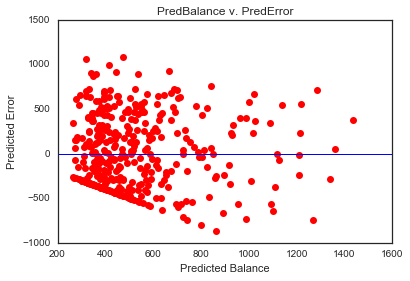

In [12]:
# check your residuals versus the Predicted Balance

plt.plot(Credit['PredBalance'], Credit['Error'], 'ro')
plt.title('PredBalance v. PredError')
plt.xlabel('Predicted Balance')
plt.ylabel('Predicted Error')
plt.axhline(y=0,c="blue",linewidth=1)

plt.show()

# Gradient Descent

In [13]:
# Gradient Descent - Step 1 - "Random Start" : mean example
# model 1:  Balance = AvgBalance + 0*Income + 0*Age

# calculate mean of Balance
Credit['AvgBalance'] = np.mean(Credit['Balance'])
# calculate deltas (aka residuals)
Credit['M1Delta'] = Credit['Balance'] - Credit['AvgBalance']
# calculate squared delta (residual sum of squares aka RSS)
Credit['RSSM1'] = np.sum(Credit['M1Delta']*Credit['M1Delta'])

Credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,PredBalance,Error,AvgBalance,M1Delta,RSSM1
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,378.238925,-45.238925,520.015,-187.015,84339911.91
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,841.656292,61.343708,520.015,382.985,84339911.91
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,856.762255,-276.762255,520.015,59.985,84339911.91
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1209.682371,-245.682371,520.015,443.985,84339911.91
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,559.561551,-228.561551,520.015,-189.015,84339911.91


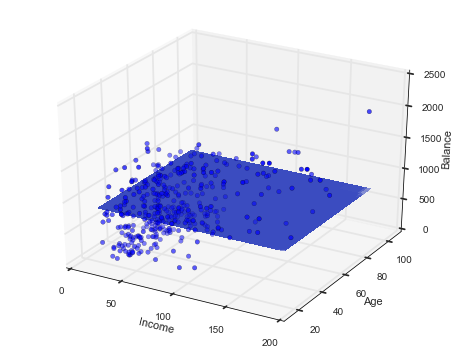

In [14]:
# 3D plot for M1
from mpl_toolkits.mplot3d import Axes3D

x = Credit['Income']
y = Credit['Age']
X, Y = np.meshgrid(x, y)
# z includes a fudge factor because the graph starts at -500 ???
Z_M1avgbal = 520 + 0*X + 0*Y + 260


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Credit['Income'], Credit['Age'], Credit['Balance'])
ax.plot_surface(X, Y, Z_M1avgbal, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False, alpha=0.2)

ax.set_zlim(0,2500)

ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Balance')

In [15]:
# Gradient Descent - "Step" #1 : Adjusted Parameters example
# model 2:  Balance = 773 + 7*Income + (-9)*Age

# calculate Model 2 predicted values of Balance
Credit['WtdBalance'] = 773 + 7*Credit['Income'] - 9*Credit['Age']
# calculate deltas
Credit['M2Delta'] = Credit['Balance'] - Credit['WtdBalance']
# calculate Residual Sum of Squares (RSS) for model 2
Credit['RSSM2'] = np.sum(Credit['M2Delta']*Credit['M2Delta'])

Credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,PredBalance,Error,AvgBalance,M1Delta,RSSM1,WtdBalance,M2Delta,RSSM2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,378.238925,-45.238925,520.015,-187.015,84339911.91,571.237,-238.237,7.289713e+07
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,841.656292,61.343708,520.015,382.985,84339911.91,777.175,125.825,7.289713e+07
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,856.762255,-276.762255,520.015,59.985,84339911.91,866.151,-286.151,7.289713e+07
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1209.682371,-245.682371,520.015,443.985,84339911.91,1491.468,-527.468,7.289713e+07
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,559.561551,-228.561551,520.015,-189.015,84339911.91,552.174,-221.174,7.289713e+07


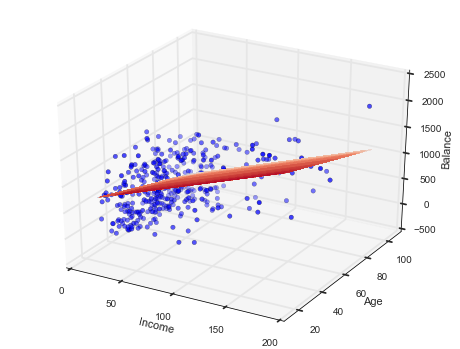

In [16]:
# 3D plot for M2 - 
from mpl_toolkits.mplot3d import Axes3D

x = Credit['Income']
y = Credit['Age']
X, Y = np.meshgrid(x, y)
Z_M2pred = 773 + 7*X - 9*Y


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Credit['Income'], Credit['Age'], Credit['Balance'])
ax.plot_surface(X, Y, Z_M2pred, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False, alpha=0.2)

# surface looks like a "line" if the next 3 lines are uncommented - 
#  it is a perspective thing affected by the axis length.
#ax.set_zlim(0,2500)
#ax.zaxis.set_major_locator(LinearLocator(6))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Balance')

In [18]:
# Gradient Descent - "Final Step" : MultRegn results example
# model 3:  Balance = Mult Regn results

# calculate MR model prediction for Balance
# already been calculated above when we did the regression
#Credit['PredBalance'] = model_mr.params[0] + model_mr.params[1]*Credit['Income'] + model_mr.params[2]*Credit['Age']
# calculate deltas
Credit['M3Delta'] = Credit['Balance'] - Credit['PredBalance']
# calculate RSS for model 3
Credit['M3Error'] = np.sum(Credit['M3Delta']*Credit['M3Delta'])


Credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,...,PredBalance,Error,AvgBalance,M1Delta,RSSM1,WtdBalance,M2Delta,RSSM2,M3Delta,M3Error
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,...,378.238925,-45.238925,520.015,-187.015,84339911.91,571.237,-238.237,7.289713e+07,-45.238925,6.565932e+07
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,...,841.656292,61.343708,520.015,382.985,84339911.91,777.175,125.825,7.289713e+07,61.343708,6.565932e+07
2,104.593,7075,514,4,71,11,Male,No,No,Asian,...,856.762255,-276.762255,520.015,59.985,84339911.91,866.151,-286.151,7.289713e+07,-276.762255,6.565932e+07
3,148.924,9504,681,3,36,11,Female,No,No,Asian,...,1209.682371,-245.682371,520.015,443.985,84339911.91,1491.468,-527.468,7.289713e+07,-245.682371,6.565932e+07
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,...,559.561551,-228.561551,520.015,-189.015,84339911.91,552.174,-221.174,7.289713e+07,-228.561551,6.565932e+07


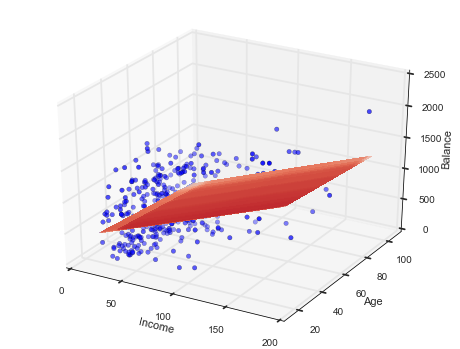

In [24]:
# 3D plot for M3 - MR model - already done above, but placed here for completeness
from mpl_toolkits.mplot3d import Axes3D

x = Credit['Income']
y = Credit['Age']
X, Y = np.meshgrid(x, y)
Z_M3MRpred = model_mr.params[0] + model_mr.params[1]*X + model_mr.params[2]*Y


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Credit['Income'], Credit['Age'], Credit['Balance'])
ax.plot_surface(X, Y, Z_M3MRpred, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False, alpha=0.2)

ax.set_zlim(0,2500)

ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Balance')

In [40]:
# Regularization on on Credit data - all continuous
#  Balance ~ 
#from scipy import stats
from statsmodels.formula.api import ols

# ols model
mr_cont = ols('Balance ~ Income + Limit + Rating + Cards + Age + Education', Credit)
mr_cont_rslt = mr_cont.fit()
print('MULTIPLE REGRESSION MODEL - Continuous Predictors')
print(mr_cont_rslt.summary())

# ridge regression
#alpha is the penalty weight, L1_wt is 0 for ridge fits
ridge_cont_rslt = mr_cont.fit_regularized(method='coord_descent', maxiter=1000, alpha=50.0, L1_wt=0)
print('RIDGE REGRESSION MODEL - Continuous Predictors')
print(ridge_cont_rslt.summary())

#alpha is the penalty weight, L1_wt is 1 for lasso fits
lasso_cont_rslt = mr_cont.fit_regularized(method='coord_descent', maxiter=1000, alpha=50.0, L1_wt=1)  
print('LASSO REGRESSION MODEL - Continuous Predictors')
print(lasso_cont_rslt.summary())

MULTIPLE REGRESSION MODEL - Continuous Predictors
                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     472.5
Date:                Tue, 06 Sep 2016   Prob (F-statistic):          3.01e-176
Time:                        16:09:28   Log-Likelihood:                -2598.2
No. Observations:                 400   AIC:                             5210.
Df Residuals:                     393   BIC:                             5238.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
In

Note how the LASSO regression sets coefficients to 0, while the Ridge regression lets them approach 0.


In [19]:
# Regularization on on Credit data - all
#  even though categorical variables are beyond our scope, you can still see which ones the Lasso regression 
#    thinks are of low importance to the model of the data.
#  Balance ~ 
#from scipy import stats
from statsmodels.formula.api import ols

# ols model
mr_all = ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', Credit)
mr_all_rslt = mr_all.fit()
print('MULTIPLE REGRESSION MODEL')
print(mr_all_rslt.summary())

# ridge regression
#alpha is the penalty weight, L1_wt is 0 for ridge fits
ridge_all_rslt = mr_all.fit_regularized(method='coord_descent', maxiter=1000, alpha=50.0, L1_wt=0)
print('RIDGE REGRESSION MODEL')
print(ridge_all_rslt.summary())

#alpha is the penalty weight, L1_wt is 1 for lasso fits
lasso_all_rslt = mr_all.fit_regularized(method='coord_descent', maxiter=1000, alpha=50.0, L1_wt=1)  
print('LASSO REGRESSION MODEL')
print(lasso_all_rslt.summary())

MULTIPLE REGRESSION MODEL
                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 07 Sep 2016   Prob (F-statistic):          1.11e-253
Time:                        17:42:09   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
In

That's all for now, folks!  